In [1]:
## file systems
from glob import glob
## importing necesary libraries 
import igraph
## plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Code
from pyfiles.numerical_descriptor import NumericalNetworkDescriptor
from pyfiles.utils import make_df_time, join_csvs

In [ ]:
# all the Networks
toy_graphs = 'A1-networks/toy'
real_graphs = 'A1-networks/real'
model_graphs = 'A1-networks/model'

In [ ]:
df_toy = make_df_time(toy_graphs)
df_toy.to_csv('res/toy_graphs.csv')

In [ ]:
df_real = make_df_time(real_graphs)
df_real.to_csv('res/real_graphs.csv')

In [ ]:
df_model = make_df_time(model_graphs)
df_model.to_csv('res/model_graphs.csv')

In [3]:
# joining the csvs 
df = join_csvs('res')

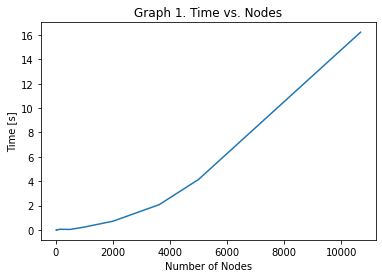

In [4]:
df = pd.read_csv('res/combined_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.groupby('Nodes')['Time'].mean().plot(title='Graph 1. Time vs. Nodes',
                                        ylabel='Time [s]',
                                        xlabel='Number of Nodes')
plt.show()

In [ ]:
## getting all the toy networks 
files = glob('A1-networks/toy/*.net')

## using the 0th as a sample: rb25.net
sample = files[0]

# reading a .net file - pajek format 
g = igraph.read(sample, format='pajek')

# directed or undirected graph?
print(g.is_directed())

# IGRAPH, followed by a four-character long code
# the number of vertices
# the number of edges
# two dashes (–) and the name of the graph
print(igraph.summary(g))
# we can see that we have 25 Vertices and 66 Edges 

# lets look at all the vertices in the graph 
vertices_list = g.vs.indices

# check that the length is the same as the one in the summary 
assert len(vertices_list) == 25
# sanity 
print(f"The vertices are the same as in the summary method ({len(vertices_list)})")

# we can also get the list of all edges 
edge_list = g.get_edgelist()

# we can also confirm that we have 66 edges in our graph 
assert len(edge_list) == 66
# verbosity 
print(f"The edges are the same as in the summary method ({len(edge_list)})")


# we can also get the degree of the graph 
# the number of edges adjacent to it 
# since this is an undirected graph 
# we don't need to specify "mode='in'" or "mode = 'out"
print(g.degree())

# plotting ## Uncomment below to plot
#out_name = 'rb25.eps'
#igraph.plot(g) # to save to specific 'out_name', use this: igraph.plot(g, out_name)

In [ ]:
# some statistics

## Edges 
num_edges = g.ecount()

## Vertex or Nodes
num_vert = g.vcount() # Vertex == Nodes 

## density
g_dense = g.density()
#graph_dens = 2*num_edges / ((num_vert) * (num_vert-1)) # manual method

## Average Path Length
avg_path_len = g.average_path_length()
# check 
assert sum(g.degree()) / g.vcount() == np.mean(g.degree())

## Average Shortest Paths
sps = np.mean(g.shortest_paths())

## Assortativity 
ast = g.assortativity_degree()

## Diameter 
diam = g.diameter()

## Degrees 
# all degrees 
degrees = g.degree()
# minimum degree 
min_degree = np.min(degrees)
# max degree
max_degree = np.max(degrees)
# Avg degree -> sum(Degrees) / Nodes
avg_degree = np.mean(degrees)

# Sanity
print(f"The number of vertices/nodes is: {num_vert}")
print(f"The number of edges is: {num_edges}")
print(f"The density of the graph is: {g_dense}")
print(f"The average path length is: {avg_path_len:.4f}")
print(f"The graphs' assortativity is: {ast:.4f}")
print(f"The graphs diameter is: {diam}")
# degrees
print(f"The minimum degree is: {min_degree}")
print(f"The average degree is: {avg_degree}")
print(f"The maximum degree is: {max_degree}")

In [ ]:
# Which one to chose?
# this one is approx 50% less than the ones below? (0.5 vs 0.9)
print(g.transitivity_undirected())
# these two give the same result 
print(g.transitivity_avglocal_undirected())
print(np.mean(g.transitivity_local_undirected()))

In [ ]:
## Other Commands ##

## Detailed Summary of the Graph
#print(g.summary(verbosity=1))

## Count of all the Vertices 
#print(g.vcount())

## Count all the edges 
#print(g.ecount())

## Adjacency Matrix 
# print(g.get_adjacency())

## entire edge list 
# print(g.get_edgelist())

## Adjacency List 
#g.get_adjlist()